<h1 style='color:blue'>Importance of Cross Validation</h1>
<br>
<p>when we train the model with x_train and y_train, and to predict the score with x_test and y_test.  This technique is not provide the accutate score, because every time the training dataset will changes according to original dataset, this accuracy model will provide some <i>false positive and negatives</i></p>

<h3 style="color: purple">Cross Validation Techniques</h3>

<ul>
    <li>Normal Score Prediction</li>
    <li>K-Fold</li>
    <li>Stratified-K-Fold</li>
    <li>cross validation</li>
</ul>

# Normal Score Prediction

In [74]:
# importing the modules
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# loading the dataset modules
from sklearn.datasets import load_digits

# techniques
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# metrics
from sklearn.metrics import confusion_matrix

# visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# essential modules
import pandas as pd
import numpy as np

# removing the warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
# creatind the data
data = load_digits()

In [3]:
dir(data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
# getting x and y
x = data.data
y = data.target

In [5]:
# creatind the dataframe
df = pd.DataFrame(x, columns=data.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [6]:
df['target'] = data.target

In [8]:
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [9]:
# generating x and y and splitting training and testing dataset
x = df.drop('target', axis=1)
y = df['target']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [16]:
# creating the models

model_logistic_regression = LogisticRegression()
model_svc = SVC()
model_random_forest_classifier = RandomForestClassifier(n_estimators=47)

model_logistic_regression.fit(x_train, y_train)
model_svc.fit(x_train, y_train)
model_random_forest_classifier.fit(x_train, y_train)

print(f"logistinc regression score is {model_logistic_regression.score(x_test, y_test)}")
print(f"svc score is {model_svc.score(x_test, y_test)}")
print(f"random forest classifier score is {model_random_forest_classifier.score(x_test, y_test)}")

logistinc regression score is 0.9555555555555556
svc score is 0.975925925925926
random forest classifier score is 0.9574074074074074


**`note`** : *we can't say that SVC is better for this dataset*

# K-Fold

<p>this k-fold algorithm works by splitting the datasets with specified splits, and obtain one testing dataset and remaining folds are used as trainig, this methods will generates the fold until number of times it reaches</p>
<br>
<div ailgn='center'>
    <img src='kf.png' width=500>
</div>
<br>

**`note`** : *we find the average of the predicted score,* which is considered as the actual score.

In [17]:
kfold = KFold(n_splits=3)

simple example using `k-fold` technique,

In [35]:
# creating the simple array for performing k-fold technique
np.random.seed(seed=7)
arr = np.random.randint(1, 100, 10)
arr

array([48, 69, 26, 68, 84, 24, 93, 58, 15, 24])

In [36]:
for train, test in kfold.split(arr):
    print(train, test)

[4 5 6 7 8 9] [0 1 2 3]
[0 1 2 3 7 8 9] [4 5 6]
[0 1 2 3 4 5 6] [7 8 9]


The given array size is `10`, it was splitted by **4, 3, 3**.  The training is used for training dataset, and test for testing the model,

<br>
<br>
here, the first testing [0, 1, 2, 3] are used as training dataset in 2nd array, and 2nd testing [4, 5, 6] is used as training in 3rd array. ll'y we can get the random training and testing dataset. and we can predict the score for each testing, and average the score is actual accuracy of score.

# Stratified-K-Fold

In [37]:
starifiedkfold = StratifiedKFold(n_splits=3)

In [61]:
# creating the array for storing the score for models
score_logistic_regression = []
score_svc = []
score_random_forest_classifier = []

In [62]:
# get score using function

def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    return model.score(x_test, y_test)

In [63]:
for train, test in starifiedkfold.split(x, y):
    x_train, x_test, y_train, y_test = data.data[train], data.data[test], data.target[train], data.target[test]
    score_logistic_regression.append(get_score(LogisticRegression(), x_train, x_test, y_train, y_test))
    score_svc.append(get_score(SVC(), x_train, x_test, y_train, y_test))    
    score_random_forest_classifier.append(get_score(RandomForestClassifier(n_estimators=40), x_train, x_test, y_train, y_test))    
   

In [64]:
score_logistic_regression

[0.9215358931552587, 0.9415692821368948, 0.9165275459098498]

In [65]:
score_svc

[0.9649415692821369, 0.9799666110183639, 0.9649415692821369]

In [66]:
score_random_forest_classifier

[0.9315525876460768, 0.9482470784641068, 0.9265442404006677]

*by making the average for this we can say, our model will good at SVC*

but the above method requie lots of necessary function, to reduce the human work **cross val score** method was introduced

# Cross Val Score

In [67]:
cross_val_score(LogisticRegression(), x, y, cv=10)

array([0.90555556, 0.96111111, 0.87777778, 0.92777778, 0.94444444,
       0.96666667, 0.95      , 0.93854749, 0.87150838, 0.93854749])

In [69]:
cross_val_score(SVC(), x, y, cv=10)

array([0.94444444, 0.98888889, 0.92777778, 0.96666667, 0.98333333,
       0.98888889, 0.98888889, 0.99441341, 0.96089385, 0.95530726])

In [71]:
cross_val_score(RandomForestClassifier(), x, y, cv=10)

array([0.91111111, 0.97222222, 0.93888889, 0.93888889, 0.95555556,
       0.96111111, 0.98333333, 0.96648045, 0.93296089, 0.93854749])

From the above scores the SVC provides the better results than the other two, models, so `Supported Vector Classifier` provide the better result for the digit classification

In [72]:
# creating the model for SVC 
model = SVC()
model.fit(x, y)
model.score(x, y)

0.996661101836394

In [73]:
y_predicted = model.predict(x)

In [75]:
conf_matrix = confusion_matrix(y, y_predicted)
conf_matrix

array([[178,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 177,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 183,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 181,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 181,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   0, 181,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 179,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0,   0, 172,   0],
       [  0,   0,   0,   1,   0,   1,   0,   1,   0, 177]], dtype=int64)

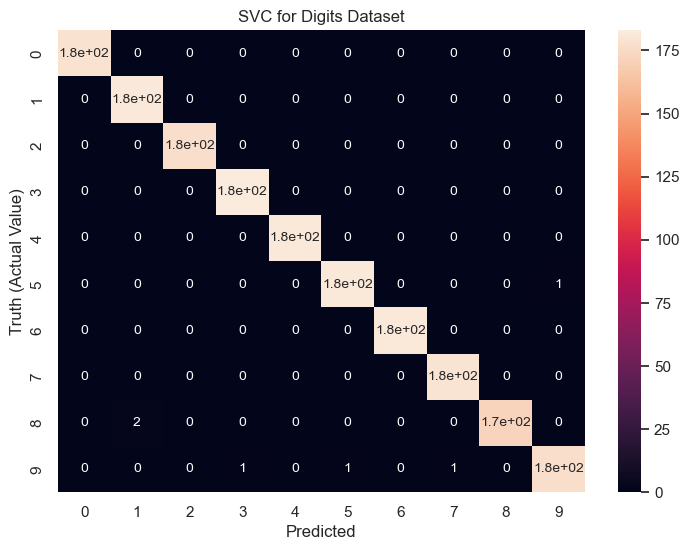

In [106]:
plt.title('SVC for Digits Dataset')
sns.set (rc = {'figure.figsize':(8.5, 6)})
sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 10})
plt.xlabel('Predicted')
plt.ylabel('Truth (Actual Value)')
plt.show()

As we predicted that `SVC` provides better, as per the graph, in (8, 1) is 2, wihch means, 2 times the model mistaken as 1 but the actual value was 8, there were many 0 in the heatmap confussion matrix, so the model works better than other.